# Lab 5: Build Your Own Instrument

In [1]:
import imageio
import rawpy
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mat
import spec_util as s_util

In [2]:
# Set up folder & file locations
img_dir = "./" # change if you want to use local files
white_light = img_dir+"white_light.NEF"
krypton = img_dir+"krypton.NEF"

In [3]:
# Read in images
raw = rawpy.imread(white_light)
img = raw.postprocess()

N, M = img.shape[:2]

### Clip the spectrum

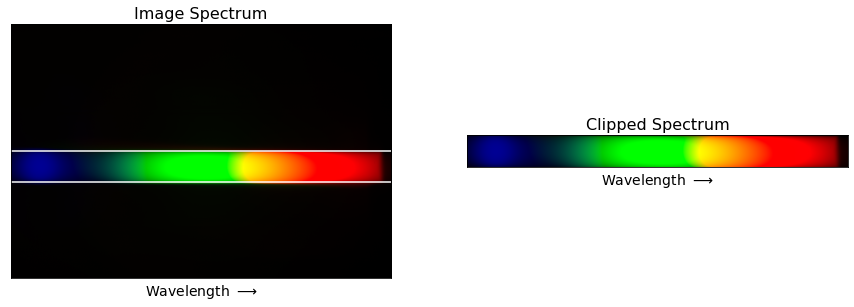

In [4]:
bounds = [2000, 2500]

fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].imshow(img)
axes[0].set_title("Image Spectrum", fontsize=16)

s_util.plot_lines(axes[0], bounds[0], bounds[1], c='w')

new_img = s_util.clip_spec(img, bounds)
axes[1].imshow(new_img)
axes[1].set_title("Clipped Spectrum", fontsize=16)

axes[0].set_xlim([0,M])
s_util.spec_labels(axes[0], y=False)
s_util.spec_labels(axes[1], y=False)

### Split the color filters and average

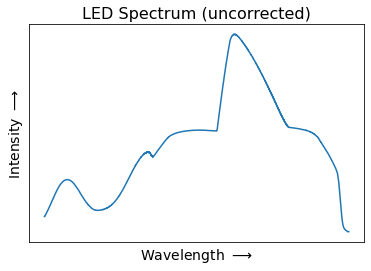

In [5]:
redspec, greenspec, bluespec = s_util.split_colors(new_img)
fig, ax = plt.subplots()
ax.plot(redspec+greenspec+bluespec)
ax.set_title("LED Spectrum (uncorrected)", fontsize=16)
s_util.spec_labels(ax)

### Correct for filter overlap

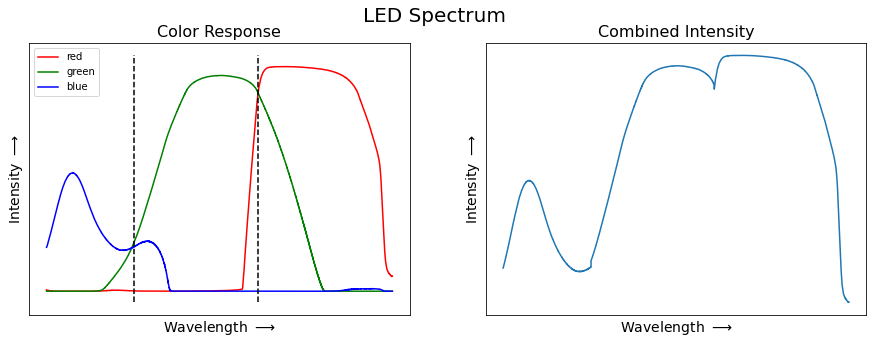

In [6]:
# Limits on color filters
red_green = 2350
green_blue = 4500

fig, axes = plt.subplots(1,2, figsize=[15,5])

# Color plots
axes[0].plot(redspec, 'r', label='red')
axes[0].plot(greenspec, 'g', label='green')
axes[0].plot(bluespec, 'b', label='blue')
axes[0].legend()
axes[0].set_title("Color Response", fontsize=16)
s_util.plot_lines(axes[0], red_green, green_blue, vert=True, 
                  c='k', ls='--')
s_util.spec_labels(axes[0])

# Combine colors
spec = s_util.combine_colors(new_img, red_green, green_blue)

# Combined plot
axes[1].plot(spec)
axes[1].set_title("Combined Intensity", fontsize=16)
plt.suptitle("LED Spectrum", fontsize=20)
s_util.spec_labels(axes[1])

### Plot Krypton spectrum

In [7]:
raw = rawpy.imread(krypton)
img = raw.postprocess()

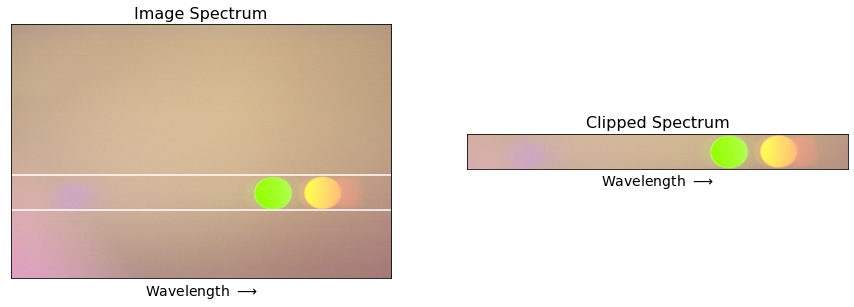

In [8]:
bounds = [2395, 2950]
s_util.test_bounds(img, bounds)
new_img = s_util.clip_spec(img, bounds)

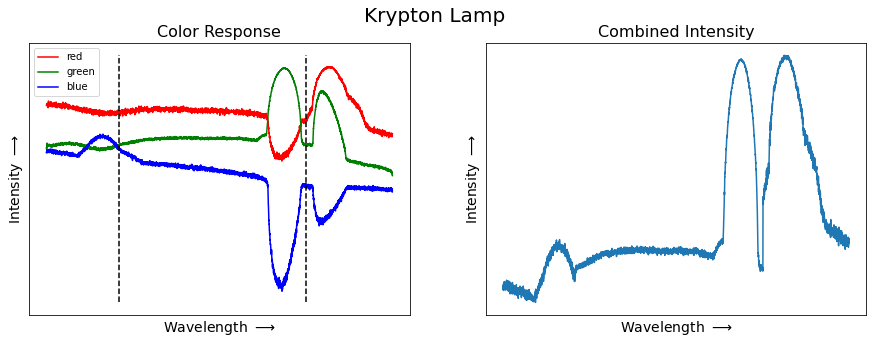

In [9]:
rg, gb = 1500, 4775
fig, axes = s_util.test_filters(new_img, rg, gb)
fig.suptitle("Krypton Lamp", fontsize=20)
plt.show()